# AML Consenus Project
## Process the data in https://github.com/NCBI-Hackathons/ConsensusML

In [1]:
clinical.dat <- read.csv ("AML_assay_clinical.csv")

In [2]:
dim (clinical.dat)

[1]   187 21492

In [4]:
training.dat <- read.csv ("TARGET_AML_Training_Samples.csv")

In [5]:
dim (training.dat)

[1] 96  2

In [6]:
training.dat[1:5,]

X,x
1,TARGET-20-PASFEW
2,TARGET-20-PARYFN
3,TARGET-20-PANSBH
4,TARGET-20-PARPDS
5,TARGET-20-PAEIKD


In [7]:
clinical.dat[1:5, 1:10]

X,TARGET.USI,Diagnostic.ID,Gender,Race,Ethnicity,Age.at.Diagnosis.in.Days,First.Event,Event.Free.Survival.Time.in.Days,Vital.Status
0,TARGET-20-PABLDZ,04A,Female,White,Not Hispanic or Latino,2455,Relapse,714,Alive
1,TARGET-20-PADYIR,04A,Male,White,Not Hispanic or Latino,1159,Relapse,373,Dead
2,TARGET-20-PADYIR,09A,Male,White,Not Hispanic or Latino,1159,Relapse,373,Dead
3,TARGET-20-PADZCG,09A,Female,Unknown,Not Hispanic or Latino,5325,Relapse,314,Dead
4,TARGET-20-PADZCG,04A,Female,Unknown,Not Hispanic or Latino,5325,Relapse,314,Dead


## get a subset of the samples in the training set

In [42]:
ind <- as.character(clinical.dat[, 2]) %in% as.character(training.dat[,2])

In [43]:
length (ind)

[1] 187

In [44]:
sum (ind)

[1] 121

In [45]:
ind[1:5]

[1] FALSE FALSE FALSE  TRUE  TRUE

In [46]:
clinical.sub1 <- clinical.dat[ind,]

In [47]:
dim (clinical.sub1)

[1]   121 21492

In [48]:
clinical.sub1 [1:5, 1:10]

,X,TARGET.USI,Diagnostic.ID,Gender,Race,Ethnicity,Age.at.Diagnosis.in.Days,First.Event,Event.Free.Survival.Time.in.Days,Vital.Status
4,3,TARGET-20-PADZCG,09A,Female,Unknown,Not Hispanic or Latino,5325,Relapse,314,Dead
5,4,TARGET-20-PADZCG,04A,Female,Unknown,Not Hispanic or Latino,5325,Relapse,314,Dead
6,5,TARGET-20-PAEAKL,09A,Female,Black or African American,Not Hispanic or Latino,5218,Relapse,134,Dead
7,6,TARGET-20-PAECCE,09A,Male,White,Not Hispanic or Latino,900,Induction failure,85,Dead
9,8,TARGET-20-PAEERJ,04A,Female,White,Not Hispanic or Latino,5082,Relapse,259,Dead


## Note that some samples have 2 diagnostic.ID as "09A" or "04A"
## will separate the two types

In [49]:
ind.9A <- which (as.character(clinical.sub1[,3])=="09A")
length (ind.9A)
ind.4A <- which (as.character(clinical.sub1[,3])=="04A")
length (ind.4A)

[1] 78

[1] 24

In [50]:
clinical.9A <- clinical.sub1[ind.9A,]
clinical.4A <- clinical.sub1[ind.4A,]

In [51]:
clinical.9A[1:5, c(2,57, 86:90)]
dim (clinical.9A)

,TARGET.USI,Risk.group,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15
4,TARGET-20-PADZCG,Standard,-1.7809495,-6.121355,3.640955,3.708995,2.382656
6,TARGET-20-PAEAKL,Standard,-2.0565009,-4.747010,4.011269,1.708597,2.457725
7,TARGET-20-PAECCE,Unknown,-0.9682173,-6.927145,4.499045,1.676106,1.436330
10,TARGET-20-PAEERJ,High,-0.6006771,-6.927145,4.337290,3.704071,1.457825
15,TARGET-20-PAEIKD,Standard,-1.4481187,-5.933690,4.498012,1.873546,1.670794


[1]    78 21492

## want to get rid of some columns, only keep Risk.group in column 57
## gene expression data starts in column 86

In [52]:
clinical.9A.sub <- clinical.9A [, c(2,57, 86:ncol(clinical.9A))]
dim (clinical.9A.sub)

[1]    78 21409

In [53]:
clinical.9A.sub[1:5, c(1:2, 21400:21409)]

,TARGET.USI,Risk.group,ENSG00000281649.1,ENSG00000281691.1,ENSG00000281706.1,ENSG00000281741.1,ENSG00000281789.1,ENSG00000281896.1,ENSG00000281912.1,X__no_feature,X__ambiguous,X__alignment_not_unique
4,TARGET-20-PADZCG,Standard,5.465605,-0.3308492,-1.8432290,-0.8014644,-0.3647071,2.1646040,-0.1526893,17.12435,14.60608,17.85268
6,TARGET-20-PAEAKL,Standard,3.838620,-2.1775560,-0.7178125,-0.8881697,1.7548210,0.4565769,0.9654962,16.79422,15.36352,19.67021
7,TARGET-20-PAECCE,Unknown,5.233891,0.8928094,-2.1475460,-2.9373360,-0.9303536,1.3036040,-1.3883210,17.07368,14.84510,17.79465
10,TARGET-20-PAEERJ,High,6.077090,0.7682412,-0.6006771,-1.5636620,-0.5062523,2.3281970,-2.9093090,16.91605,14.56523,17.57099
15,TARGET-20-PAEIKD,Standard,5.939895,0.2397353,-2.4802340,-1.6545250,-1.4164160,1.0597870,-1.9398530,16.46459,14.76246,17.58458


In [54]:
# get rid of the last 3 columns
clinical.9A.sub <- clinical.9A.sub[, -c(21407, 21408, 21409)]
dim (clinical.9A.sub)

[1]    78 21406

In [55]:
clinical.9A.sub[1:5, 21400:21406]

,ENSG00000281649.1,ENSG00000281691.1,ENSG00000281706.1,ENSG00000281741.1,ENSG00000281789.1,ENSG00000281896.1,ENSG00000281912.1
4,5.465605,-0.3308492,-1.8432290,-0.8014644,-0.3647071,2.1646040,-0.1526893
6,3.838620,-2.1775560,-0.7178125,-0.8881697,1.7548210,0.4565769,0.9654962
7,5.233891,0.8928094,-2.1475460,-2.9373360,-0.9303536,1.3036040,-1.3883210
10,6.077090,0.7682412,-0.6006771,-1.5636620,-0.5062523,2.3281970,-2.9093090
15,5.939895,0.2397353,-2.4802340,-1.6545250,-1.4164160,1.0597870,-1.9398530


In [56]:
dimnames(clinical.9A.sub)[[1]] <- clinical.9A.sub[,1]
clinical.9A.sub[1:5, 1:6]

,TARGET.USI,Risk.group,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12
TARGET-20-PADZCG,TARGET-20-PADZCG,Standard,-1.7809495,-6.121355,3.640955,3.708995
TARGET-20-PAEAKL,TARGET-20-PAEAKL,Standard,-2.0565009,-4.747010,4.011269,1.708597
TARGET-20-PAECCE,TARGET-20-PAECCE,Unknown,-0.9682173,-6.927145,4.499045,1.676106
TARGET-20-PAEERJ,TARGET-20-PAEERJ,High,-0.6006771,-6.927145,4.337290,3.704071
TARGET-20-PAEIKD,TARGET-20-PAEIKD,Standard,-1.4481187,-5.933690,4.498012,1.873546


In [57]:
clinical.9A.sub <- clinical.9A.sub[, -1]
clinical.9A.sub[1:5, 1:6]

,Risk.group,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15
TARGET-20-PADZCG,Standard,-1.7809495,-6.121355,3.640955,3.708995,2.382656
TARGET-20-PAEAKL,Standard,-2.0565009,-4.747010,4.011269,1.708597,2.457725
TARGET-20-PAECCE,Unknown,-0.9682173,-6.927145,4.499045,1.676106,1.436330
TARGET-20-PAEERJ,High,-0.6006771,-6.927145,4.337290,3.704071,1.457825
TARGET-20-PAEIKD,Standard,-1.4481187,-5.933690,4.498012,1.873546,1.670794


In [58]:
risk.group.9A <- as.character(clinical.9A.sub[,1])
unique (risk.group.9A)

[1] "Standard" "Unknown"  "High"     "Low"

In [59]:
sum (risk.group.9A == "Standard")
sum (risk.group.9A == "Unknown")
sum (risk.group.9A == "High")
sum (risk.group.9A == "Low")

[1] 44

[1] 3

[1] 3

[1] 28

## will build predictive models for Standard vs. Low

In [60]:
risk.group.9A.std <- which (risk.group.9A == "Standard")
risk.group.9A.Low <- which (risk.group.9A == "Low")

In [61]:
length (risk.group.9A.std)
length (risk.group.9A.Low)

[1] 44

[1] 28

In [62]:
clinical.9A.std <- clinical.9A.sub[risk.group.9A.std, ]
clinical.9A.low <- clinical.9A.sub[risk.group.9A.Low, ]
clinical.9A.combined <- rbind (clinical.9A.std, clinical.9A.low)
dim (clinical.9A.combined)

[1]    72 21405

In [63]:
clinical.9A.combined[1:5, 1:6]

,Risk.group,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15
TARGET-20-PADZCG,Standard,-1.7809495,-6.121355,3.640955,3.708995,2.382656
TARGET-20-PAEAKL,Standard,-2.0565009,-4.747010,4.011269,1.708597,2.457725
TARGET-20-PAEIKD,Standard,-1.4481187,-5.933690,4.498012,1.873546,1.670794
TARGET-20-PAKIWK,Standard,-0.8506332,-6.927145,5.087099,2.016304,2.022893
TARGET-20-PAKIYW,Standard,-1.4995312,-6.927145,4.568871,2.582901,2.749274


In [64]:
y.combined <- c(rep(0:44), rep(1:28))

In [65]:
write.table (clinical.9A.combined, file="clinical_9A_standard_low_risk.txt", sep="\t", quote=F, row.names=T, col.names=T)

In [66]:
clinical.9A.combined.expr <- clinical.9A.combined[, -1]

In [67]:
t.test (clinical.9A.combined.expr[1:44, 1], clinical.9A.combined.expr[45:72, 1])


	Welch Two Sample t-test

data:  clinical.9A.combined.expr[1:44, 1] and clinical.9A.combined.expr[45:72, 1]
t = 4.0656, df = 69.986, p-value = 0.0001237
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.100917 3.221178
sample estimates:
mean of x mean of y 
-1.803958 -3.965005 


In [73]:
t.test (clinical.9A.combined.expr[1:44, 21404], clinical.9A.combined.expr[45:72, 21404])


	Welch Two Sample t-test

data:  clinical.9A.combined.expr[1:44, 21404] and clinical.9A.combined.expr[45:72, 21404]
t = 1.9975, df = 48.026, p-value = 0.05145
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.004302557  1.316235415
sample estimates:
 mean of x  mean of y 
-0.8867361 -1.5427026 


In [75]:
dim (clinical.9A.combined.expr)
any (is.na (clinical.9A.combined.expr))

[1]    72 21404

[1] FALSE

In [76]:
# compute the standard deviation
sd.vec <- apply (clinical.9A.combined.expr, 2, function(x){ sd(x)})

In [77]:
length (sd.vec)

[1] 21404

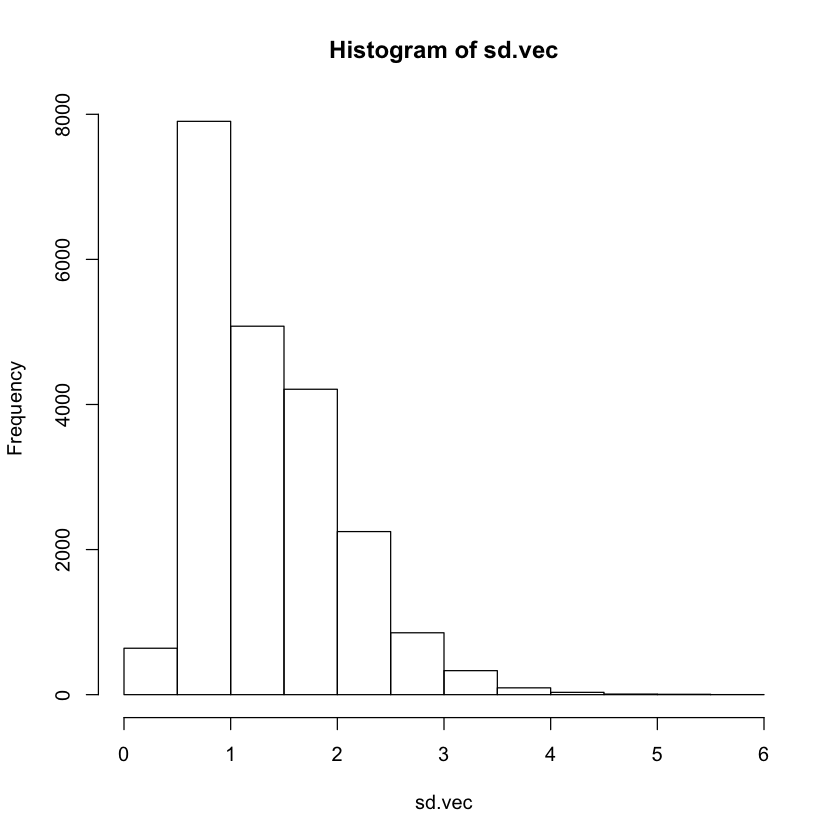

In [78]:
hist (sd.vec)

In [81]:
sum (sd.vec > 3)

[1] 471

In [82]:
clinical.9A.combined.expr.sd3 <- clinical.9A.combined.expr[, which(sd.vec > 3)]
dim (clinical.9A.combined.expr.sd3)

[1]  72 471

In [83]:
write.table (clinical.9A.combined.expr.sd3, file="clinical_9A_standard_low_risk_sd3.txt", sep="\t", quote=F, row.names=T, col.names=T)

## Now, we have a subset of the AML data consisting of 72 samples (44 standard vs. 28 low risk) across 471 genes with SD > 3